### EDA of Original WSP Dataset

#### File Set-up

In [3]:
import image_transformation_functions as transf_func
import os
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [4]:
# set directory for labels, image height & image width
labels_directory = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-2/Bbox labels/"
image_height = 640
image_width = 640

In [5]:
# save all bbox details
all_class_labels = []
all_centre_x = []
all_centre_y = []
all_widths = []
all_heights = []
file_name_dict = {}
for file_name in os.listdir(labels_directory):
    file_class_labels, file_bbox_coords = transf_func.save_labels_coords_from_file(f"{labels_directory}{file_name}")
    file_name_dict[file_name] = file_bbox_coords
    centre_x = [coord[0]*image_width for coord in file_bbox_coords]
    centre_y = [-coord[1]*image_height for coord in file_bbox_coords]
    bbox_width = [coord[2]*image_width for coord in file_bbox_coords]
    bbox_height = [coord[3]*image_height for coord in file_bbox_coords]
    all_class_labels.append(file_class_labels)
    all_centre_x.append(centre_x)
    all_centre_y.append(centre_y)
    all_widths.append(bbox_width)
    all_heights.append(bbox_height)

In [6]:
# unpack lists
unpacked_class_labels = [label for list in all_class_labels for label in list]
unpacked_centre_x = [x for list in all_centre_x for x in list]
unpacked_centre_y = [y for list in all_centre_y for y in list]
unpacked_widths = [width for list in all_widths for width in list]
unpacked_heights = [height for list in all_heights for height in list]

In [7]:
# merge unpacked lists
merged_lists = list(zip(unpacked_class_labels, unpacked_centre_x, unpacked_centre_y, unpacked_widths, unpacked_heights))
merged_lists[0]

(2, 369.5, -358.5, 97.5, 99.5)

In [8]:
# create DataFrame for analysis, add bbox area column
bbox_df = pd.DataFrame(merged_lists, columns=["class_label", "centre_x", "centre_y", "width", "height"])
bbox_df["bbox_area"] = bbox_df["width"] * bbox_df["height"]

# rename class labels as vehicle types
orig_class_names = {0: "Bicycle", 1: "Car", 2: "LGV", 3: "Motorcycle", 4: "Rigid 2 Axle", 5: "Rigid 3 Axle", 6: "Rigid 4 Axle"}
bbox_df["class_label"].replace(orig_class_names, inplace=True)

bbox_df

,class_label,centre_x,centre_y,width,height,bbox_area
0,LGV,369.50,-358.5,97.5,99.500000,9701.250000
1,LGV,408.00,-348.0,74.0,89.500000,6623.000000
2,LGV,434.00,-341.5,60.0,75.000000,4500.000000
3,LGV,454.50,-337.5,50.5,64.000000,3232.000000
4,LGV,467.00,-334.5,39.5,58.000000,2291.000000
...,...,...,...,...,...,...
1045,Car,338.75,-464.0,190.5,213.333334,40640.000127
1046,Rigid 3 Axle,527.00,-309.0,17.5,36.500000,638.750000
1047,Rigid 4 Axle,477.50,-317.5,53.5,74.500000,3985.750000
1048,Rigid 4 Axle,507.50,-312.5,30.0,47.500000,1425.000000


#### Size of Dataset

In [151]:
# number of original images
len(os.listdir(labels_directory))

573

In [153]:
# number of annotated vehicles
len(bbox_df)

1050

#### Bounding Box Locations

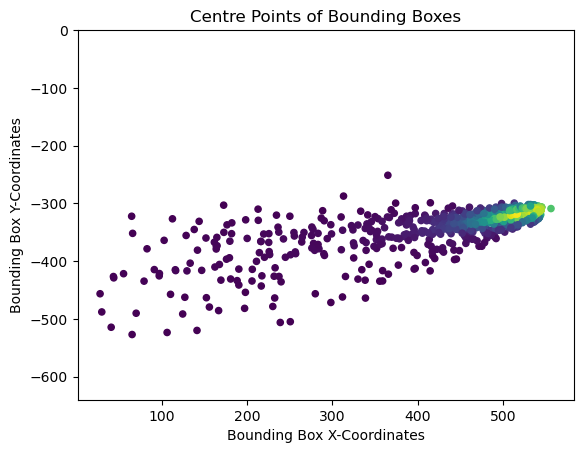

In [20]:
# draw density scatterplot of centre points
xy = np.vstack([bbox_df["centre_x"],bbox_df["centre_y"]])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(bbox_df["centre_x"], bbox_df["centre_y"], c=z, s=20)
ax.set_ylim(ymin=-640,ymax=0)
plt.xlabel("Bounding Box X-Coordinates")
plt.ylabel("Bounding Box Y-Coordinates")
plt.title("Centre Points of Bounding Boxes")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/density_plot_bboxes.png", bbox_inches="tight")
plt.show()

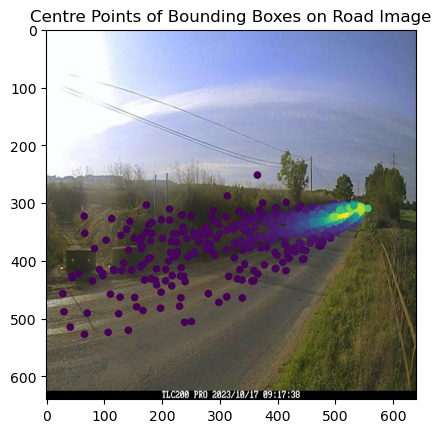

In [34]:
# plot bounding boxes on image of road
im = plt.imread("C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-2/train/images/130_jpg.rf.65533dbd6a2ebb5dc71d4d72a8f74bb7.jpg")
implot = plt.imshow(im)
plt.scatter(bbox_df["centre_x"], -bbox_df["centre_y"], c=z, s=20)
plt.title("Centre Points of Bounding Boxes on Road Image")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/density_plot_bboxes_on_image.png", bbox_inches="tight")
plt.show()

#### Bounding Box Size

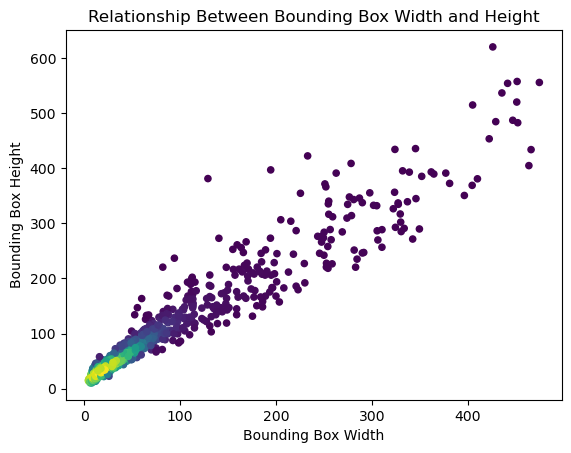

In [174]:
# draw density scatterplot of width and height
xy = np.vstack([bbox_df["width"],bbox_df["height"]])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(bbox_df["width"], bbox_df["height"], c=z, s=20)
plt.xlabel("Bounding Box Width")
plt.ylabel("Bounding Box Height")
plt.title("Relationship Between Bounding Box Width and Height")
fig.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/density_plot_bboxes_width_height.png", bbox_inches="tight")
plt.show()

C:\Users\jamie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


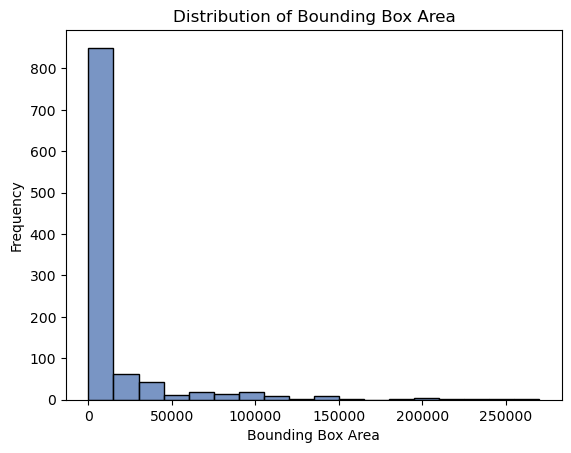

In [13]:
# histogram of bounding box size
sns.set_palette("deep")
fig = sns.histplot(data=bbox_df, x="bbox_area", binwidth=15000)
fig.set_xlabel("Bounding Box Area")
fig.set_ylabel("Frequency")
fig.set_title("Distribution of Bounding Box Area")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/bbox_area_distribution.png", bbox_inches="tight")
plt.show()

Find the largest bounding boxes and return the image names

In [178]:
# summary statistics for bbox area/size
bbox_df["bbox_area"].describe()

count      1050.000000
mean      14299.692490
std       34841.890005
min          65.250000
25%         388.125000
50%        1263.281674
75%        8328.135909
max      264120.000000
Name: bbox_area, dtype: float64

In [235]:
# sort by bbox size in descending order
bbox_df.sort_values(by=["bbox_area"], ascending=False).head()

,class_label,centre_x,centre_y,width,height,bbox_area
94,Rigid 4 Axle,213.000000,-310.000000,426.000000,620.000000,264120.000000
739,Rigid 4 Axle,237.272728,-349.777778,474.545455,555.555556,263636.364100
803,Rigid 4 Axle,225.681818,-352.444445,451.363636,557.333333,251559.999647
668,Rigid 4 Axle,264.727272,-358.585859,441.454545,553.939394,244539.063136
257,Rigid 4 Axle,225.500000,-367.555556,451.000000,520.000000,234520.000000


Search for the images containing the largest bounding boxes

In [238]:
# find non-rounded value of centre_x for largest bounding box
bbox_df.loc[94, "centre_x"]

213.0

In [240]:
# search file_name dictionary for the file name that matches the centre_x coordinate for largest bbox
for name, values in file_name_dict.items():
    for value in values:
        for subvalue in value:
            if subvalue == 213.0/640:
                print(name)

1474_jpg.rf.07310a698e140429b0074fe90831692a.txt
2180_jpg.rf.dc180609d0e7e1418bef2e09d490f86c.txt


In [242]:
# double-check where the searched values appear in the df
bbox_df[bbox_df["centre_x"].isin([213.000000])]

,class_label,centre_x,centre_y,width,height,bbox_area
94,Rigid 4 Axle,213.0,-310.0,426.0,620.0,264120.0


In [244]:
# find non-rounded value of centre_x for second-largest bounding box
bbox_df.loc[739, "centre_x"]

237.2727275

In [246]:
# search file_name dictionary for the file name that matches the centre_x coordinate for second-largest bbox
for name, values in file_name_dict.items():
    for value in values:
        for subvalue in value:
            if subvalue == 237.2727275/640:
                print(name)

3298_jpg.rf.cb1c103f3883ff3d6027562716d1232e.txt


##### As expected, both the largest bounding boxes are for images where the target vehicle is very close to the camera

In [249]:
# how many boxes are larger than the mean?
bbox_df[bbox_df["bbox_area"] >= bbox_df["bbox_area"].mean()]

,class_label,centre_x,centre_y,width,height,bbox_area
27,Rigid 4 Axle,445.000000,-340.000000,130.500000,187.500000,24468.750000
28,Rigid 4 Axle,405.500000,-351.500000,184.500000,245.500000,45294.750000
30,Rigid 4 Axle,339.500000,-381.333333,281.000000,343.111111,96414.222191
31,Rigid 4 Axle,226.000000,-383.500000,452.000000,482.500000,218090.000000
34,Rigid 2 Axle,198.500000,-328.500000,274.000000,309.500000,84803.000000
...,...,...,...,...,...,...
1024,Rigid 4 Axle,299.045455,-352.888889,230.090909,192.000000,44177.454528
1029,Rigid 4 Axle,343.000000,-342.585859,184.000000,166.383838,30614.626192
1032,Rigid 4 Axle,377.636364,-333.616162,149.272727,145.212121,21676.209295
1035,Rigid 4 Axle,403.931818,-329.737374,124.863636,124.525252,15548.675739


In [251]:
# boxes smaller than the mean
bbox_df[bbox_df["bbox_area"] < bbox_df["bbox_area"].mean()]

,class_label,centre_x,centre_y,width,height,bbox_area
0,LGV,369.50,-358.5,97.5,99.500000,9701.250000
1,LGV,408.00,-348.0,74.0,89.500000,6623.000000
2,LGV,434.00,-341.5,60.0,75.000000,4500.000000
3,LGV,454.50,-337.5,50.5,64.000000,3232.000000
4,LGV,467.00,-334.5,39.5,58.000000,2291.000000
...,...,...,...,...,...,...
1044,Car,478.25,-368.0,59.5,76.444444,4548.444418
1046,Rigid 3 Axle,527.00,-309.0,17.5,36.500000,638.750000
1047,Rigid 4 Axle,477.50,-317.5,53.5,74.500000,3985.750000
1048,Rigid 4 Axle,507.50,-312.5,30.0,47.500000,1425.000000


In [253]:
# calculate ratio of large to small boxes
total_boxes = len(bbox_df)
small_perc = round((len(bbox_df[bbox_df["bbox_area"] < bbox_df["bbox_area"].mean()]) / total_boxes)*100)
large_perc = round((len(bbox_df[bbox_df["bbox_area"] >= bbox_df["bbox_area"].mean()]) / total_boxes)*100)
print(f"Small bounding boxes comprise {small_perc}% of the total boxes")
print(f"Large bounding boxes comprise {large_perc}% of the total boxes")

Small bounding boxes comprise 80% of the total boxes
Large bounding boxes comprise 20% of the total boxes


##### 20% of the bounding boxes are larger than the mean box size, 80% are smaller. This shows the disproportionate number of small objects in the original dataset.

### Balance of Object Size
Assess number of objects with bounding box area smaller than 0.1% of the total image size.

In [265]:
# set 0.1% area threshold
box_area_threshold = (image_width*image_height)*0.001

# df of boxes smaller than threshold
threshold_bbox_df = bbox_df[bbox_df["bbox_area"] <= box_area_threshold].reset_index(drop=True)

# df of boxes larger than threshold
threshold_greater_bbox_df = bbox_df[bbox_df["bbox_area"] >= box_area_threshold].reset_index(drop=True)

In [268]:
# number of each vehicle type under small object threshold
threshold_bbox_freq = threshold_bbox_df["class_label"].value_counts().reset_index(name='Frequency').rename(columns={'class_label':'Vehicle Type'})

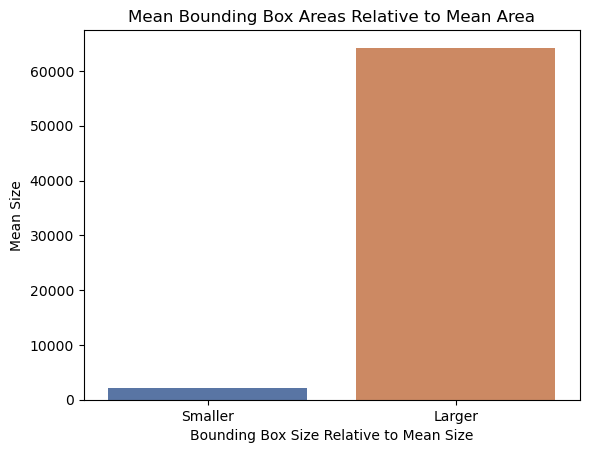

In [1153]:
# barplot of average size of boxes larger and smaller than the mean size
mean_area_df = pd.DataFrame([["Smaller",bbox_df[bbox_df["bbox_area"] <= bbox_df["bbox_area"].mean()]["bbox_area"].mean()],
                             ["Larger",bbox_df[bbox_df["bbox_area"] >= bbox_df["bbox_area"].mean()]["bbox_area"].mean()]],
                           columns=["rel_to_mean_area", "mean_area"])

sns.set_palette("deep")
fig = sns.barplot(x=mean_area_df["rel_to_mean_area"], y=mean_area_df["mean_area"])
fig.set_xlabel("Bounding Box Size Relative to Mean Size")
fig.set_ylabel("Mean Size")
fig.set_title("Mean Bounding Box Areas Relative to Mean Area")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/mean_box_area_by_group.png", bbox_inches="tight")
plt.show()

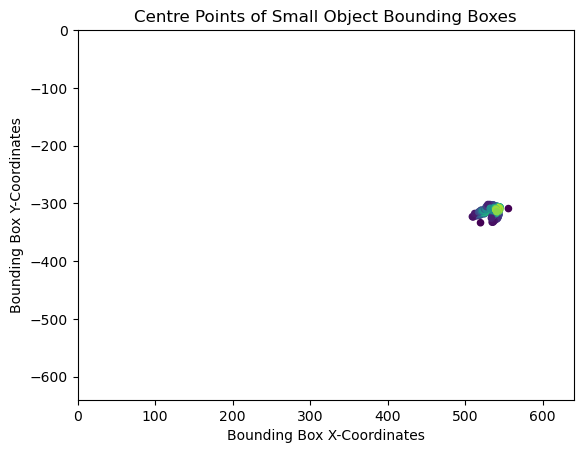

In [283]:
# chart showing small object bbox locations
xy_small = np.vstack([threshold_bbox_df["centre_x"],threshold_bbox_df["centre_y"]])
z_small = gaussian_kde(xy_small)(xy_small)

fig, ax = plt.subplots()
ax.scatter(threshold_bbox_df["centre_x"], threshold_bbox_df["centre_y"], c=z_small, s=20)
ax.set_ylim(ymin=-640,ymax=0)
ax.set_xlim(xmin=0, xmax=640)
plt.xlabel("Bounding Box X-Coordinates")
plt.ylabel("Bounding Box Y-Coordinates")
plt.title("Centre Points of Small Object Bounding Boxes")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/density_plot_small_object_centrepoints.png", bbox_inches="tight")
plt.show()

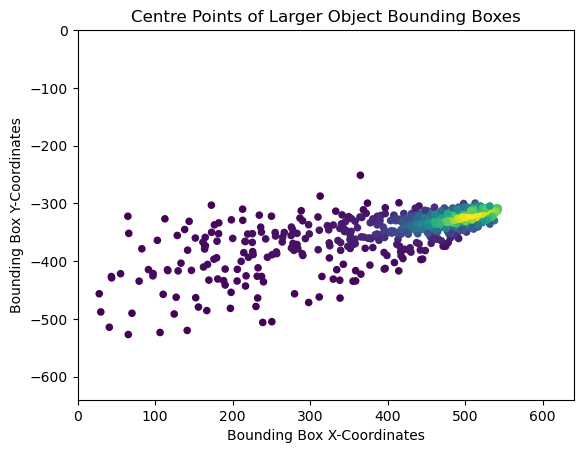

In [285]:
# chart showing larger object bbox locations
xy_larger = np.vstack([threshold_greater_bbox_df["centre_x"],threshold_greater_bbox_df["centre_y"]])
z_larger = gaussian_kde(xy_larger)(xy_larger)

fig, ax = plt.subplots()
ax.scatter(threshold_greater_bbox_df["centre_x"], threshold_greater_bbox_df["centre_y"], c=z_larger, s=20)
ax.set_ylim(ymin=-640,ymax=0)
ax.set_xlim(xmin=0, xmax=640)
plt.xlabel("Bounding Box X-Coordinates")
plt.ylabel("Bounding Box Y-Coordinates")
plt.title("Centre Points of Larger Object Bounding Boxes")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/density_plot_larger_object_centrepoints.png", bbox_inches="tight")
plt.show()

### Class Label Exploration

In [715]:
# save number of objects per image
class_labels_all_files = []
num_objects_per_file = []
for file in os.listdir(labels_directory):
    num_objects_per_file.append([file, len(transf_func.save_class_labels_from_file(f"{labels_directory}{file}"))])
    class_labels_all_files.append(transf_func.save_class_labels_from_file(f"{labels_directory}{file}"))

In [716]:
# create df of number of objects per image
image_objects_df = pd.DataFrame(num_objects_per_file, columns=["file_name", "objects_per_file"])
image_objects_df.head()

,file_name,objects_per_file
0,100_jpg.rf.f66b1b30ca89cf2da21944efbb8d897e.txt,1
1,101_jpg.rf.8111b409d607fa6456d71083ebfa0f10.txt,1
2,102_jpg.rf.c203cc5be4033385587eb63f3174529f.txt,1
3,103_jpg.rf.79f01e59cdcb1a3efc77aae2914a572b.txt,1
4,104_jpg.rf.165eafaa2c21c3bad0864c78f693f853.txt,1


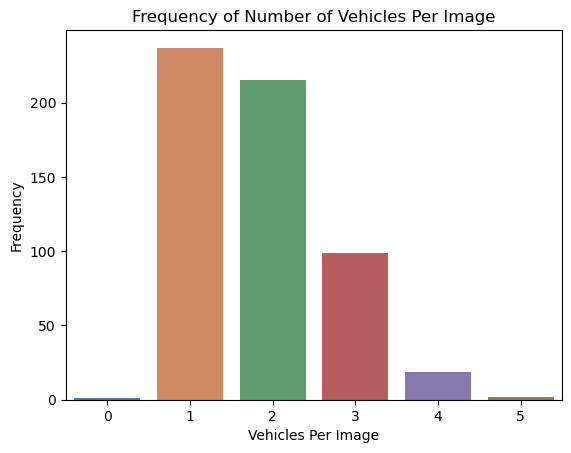

In [1005]:
# bar plot number of objects per image
sns.set_palette("deep")
fig = sns.countplot(image_objects_df, x="objects_per_file")
fig.set_xlabel("Vehicles Per Image")
fig.set_ylabel("Frequency")
fig.set_title("Frequency of Number of Vehicles Per Image")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/frequency_number_vehicles_per_image.png", bbox_inches="tight")

In [717]:
# summary statistics for objects per image
image_objects_df["objects_per_file"].describe()

count    573.000000
mean       1.832461
std        0.854765
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: objects_per_file, dtype: float64

### Class Balance

In [202]:
# save class labels from directory
orig_class_labels = transf_func.save_class_labels_from_directory("C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-2/all labels/")

# create df of labels
orig_class_names = {0: "Bicycle", 1: "Car", 2: "LGV", 3: "Motorcycle", 4: "Rigid 2 Axle", 5: "Rigid 3 Axle", 6: "Rigid 4 Axle"}

orig_classes_df = transf_func.create_class_labels_df(orig_class_labels, orig_class_names)
orig_classes_df["class_label_txt"].value_counts()

class_label_txt
LGV             416
Rigid 4 Axle    220
Car             205
Rigid 2 Axle    163
Rigid 3 Axle     23
Bicycle          19
Motorcycle        4
Name: count, dtype: int64

In [204]:
# drop two-wheeled vehicles
orig_multi_wheel_df = orig_classes_df[orig_classes_df["class_label_txt"]!="Bicycle"]
orig_multi_wheel_df = orig_multi_wheel_df[orig_multi_wheel_df["class_label_txt"]!="Motorcycle"]
orig_multi_wheel_df["class_label_txt"].value_counts()

class_label_txt
LGV             416
Rigid 4 Axle    220
Car             205
Rigid 2 Axle    163
Rigid 3 Axle     23
Name: count, dtype: int64

In [206]:
# rename df columns
orig_freq_counts = orig_multi_wheel_df["class_label_txt"].value_counts().reset_index(name='Frequency').rename(columns={'class_label_txt':'Vehicle Type'})

# add new classes
orig_freq_counts = pd.concat([orig_freq_counts, pd.DataFrame([
    {"Vehicle Type": "Articulated","Frequency": 0},
    {"Vehicle Type": "Bus","Frequency": 0},
    {"Vehicle Type": "Coach","Frequency": 0},
    {"Vehicle Type": "Taxi","Frequency": 0}
])], ignore_index=True)

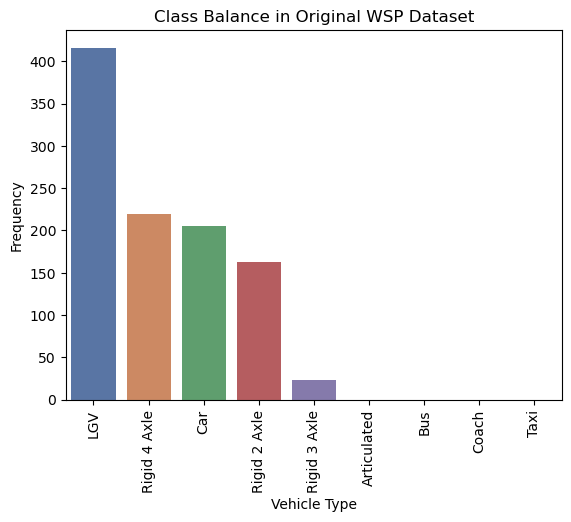

In [1167]:
# bar plot of class balance in original WSP dataset
ax = sns.barplot(x=orig_freq_counts["Vehicle Type"], y=orig_freq_counts["Frequency"])
sns.set_palette("deep")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Class Balance in Original WSP Dataset")
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Original WSP Dataset Charts/class_balance.png", bbox_inches="tight")
plt.show()